<a href="https://colab.research.google.com/github/adrielsvr/Sentimen-Analisis-Publik-terhadap-Transportasi-Kereta-di-Jakarta/blob/main/Preprocessing/Pelabelan_Data_Transportasi_Kereta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_krl = '/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_KRL_stemming.csv'
path_mrt = '/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_MRT_stemming.csv'
path_lrt = '/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_LRT_stemming.csv'

data_preprocess_krl = pd.read_csv(path_krl)
data_preprocess_mrt = pd.read_csv(path_mrt)
data_preprocess_lrt = pd.read_csv(path_lrt)

print(f"DATA KRL \n {data_preprocess_krl['stemming'].head()}\n")
print(f"DATA MRT \n {data_preprocess_mrt['stemming'].head()}\n")
print(f"DATA LRT \n {data_preprocess_lrt['stemming'].head()}")

DATA KRL 
 0    hai kakak kartu krl commuter line guna naik mr...
1    keujanan bogor gigil lama krl pas jakarta ange...
2    aku bkn orang jakarta tiap kesana seru gitu ka...
3         justru hari lebaran krl sepi jakarta lengang
4    ruang ah jakarta mah ribut tawur metro mini pa...
Name: stemming, dtype: object

DATA MRT 
 0    ubah jadwal operasional mrt jakarta malam tahu...
1    lebih bagus kalau ajar halte nyambung krl mrt ...
2                              bal needs airport train
3    terlalu fokus perang bom aksi laga lain lupa h...
4    siapa sini citacita nya strolling arround jaka...
Name: stemming, dtype: object

DATA LRT 
 0    lrt jabodebek siap atas macet ayo cek cara nai...
1    dewi perssik sebut nikita mirzani jual apem ir...
2    viral rok model lorot rachel vennya tampil buk...
3    bangun habis mimpi naik lrt jakarta nyampe sta...
4    damping presiden jokowi resmi kereta api ringa...
Name: stemming, dtype: object


In [ ]:
data_preprocess_krl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_text          7795 non-null   object
 1   clean_text         7795 non-null   object
 2   normalisasi        7795 non-null   object
 3   tokenized_text     7795 non-null   object
 4   stopwords_removal  7795 non-null   object
 5   stemming           7795 non-null   object
dtypes: object(6)
memory usage: 365.5+ KB


In [ ]:
print('Data KRL :', data_preprocess_krl['stemming'].count())
print('Data MRT :', data_preprocess_mrt['stemming'].count())
print('Data LRT :', data_preprocess_lrt['stemming'].count())

Data KRL : 7795
Data MRT : 9471
Data LRT : 2308


In [ ]:
print(data_preprocess_krl['stemming'].isna().sum())
print(data_preprocess_mrt['stemming'].isna().sum())
print(data_preprocess_lrt['stemming'].isna().sum())

print(data_preprocess_krl[data_preprocess_krl['stemming']==''].sum())
print(data_preprocess_mrt[data_preprocess_mrt['stemming']==''].sum())
print(data_preprocess_lrt[data_preprocess_lrt['stemming']==''].sum())

0
81
0
full_text            0
clean_text           0
normalisasi          0
tokenized_text       0
stopwords_removal    0
stemming             0
dtype: object
full_text            0
clean_text           0
normalisasi          0
tokenized_text       0
stopwords_removal    0
stemming             0
dtype: object
full_text            0
clean_text           0
normalisasi          0
tokenized_text       0
stopwords_removal    0
stemming             0
dtype: object


In [ ]:
data_preprocess_krl = data_preprocess_krl.dropna()
data_preprocess_mrt = data_preprocess_mrt.dropna()
data_preprocess_lrt = data_preprocess_lrt.dropna()

In [ ]:
print(data_preprocess_krl.duplicated(subset='stemming').sum())
print(data_preprocess_mrt.duplicated(subset='stemming').sum())
print(data_preprocess_lrt.duplicated(subset='stemming').sum())

369
858
126


In [ ]:
data_preprocess_krl = data_preprocess_krl.drop_duplicates(subset='stemming')
data_preprocess_mrt = data_preprocess_mrt.drop_duplicates(subset='stemming')
data_preprocess_lrt = data_preprocess_lrt.drop_duplicates(subset='stemming')

In [ ]:
print('Data KRL :', data_preprocess_krl['stemming'].count())
print('Data MRT :', data_preprocess_mrt['stemming'].count())
print('Data LRT :', data_preprocess_lrt['stemming'].count())

Data KRL : 7426
Data MRT : 8613
Data LRT : 2182


In [ ]:
# Mengambil path data sentimen berbahasa indonesia dari github
path_positif = 'https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv'
path_negatif = 'https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv'

# Membaca data sentimen dari path
positif_sentiment = pd.read_csv(path_positif, delimiter='\t')
negatif_sentiment = pd.read_csv(path_negatif, delimiter='\t')

# Menjadikan data sentimen menjadi bentuk dictionary
positif_dict = dict(zip(positif_sentiment['word'], positif_sentiment['weight']))
negatif_dict = dict(zip(negatif_sentiment['word'], negatif_sentiment['weight']))

# Menggabungkan dictionary sentimen positif dengan negatif
sentiment_dict = {**positif_dict, **negatif_dict}

# Mendefenisikan fungsi untuk menghitung skor polaritas
def polarity_score(text, sentiment_dict):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

# Mengimplementasikan fungsi polarity_score ke dataset
data_preprocess_krl['polarity_score'] = data_preprocess_krl['stemming'].apply(lambda x: polarity_score(x, sentiment_dict))
data_preprocess_mrt['polarity_score'] = data_preprocess_mrt['stemming'].apply(lambda x: polarity_score(x, sentiment_dict))
data_preprocess_lrt['polarity_score'] = data_preprocess_lrt['stemming'].apply(lambda x: polarity_score(x, sentiment_dict))

# Menampilkan hasil dataset polarity_score
print(f'DATA KRL \n {data_preprocess_krl.head()}\n')
print(f'DATA MRT \n {data_preprocess_mrt.head()}\n')
print(f'DATA LRT \n {data_preprocess_lrt.head()}')

DATA KRL 
                                            full_text  \
0  @miaetsumi Hai, Kak. Untuk kartu KRL Commuter ...   
1  Keujanan di Bogor, menggigil selama di KRL, pa...   
2  @tanyarlfes Karena aku bkn orang jakarta, tiap...   
3  @adriansyahyasin Justru di hari lebaran itu KR...   
4  @JakartaAwayDay Udah gak ada ruang lagi ah di ...   

                                          clean_text  \
0   hai kak untuk kartu krl commuter line dapat d...   
1  keujanan di bogor menggigil selama di krl pas ...   
2   karena aku bkn orang jakarta tiap kesana seru...   
3   justru di hari lebaran itu krl sepi karena ja...   
4   udah gak ada ruang lagi ah di jakarta mah rib...   

                                         normalisasi  \
0  hai kakak untuk kartu krl commuter line dapat ...   
1  keujanan di bogor menggigil selama di krl pas ...   
2  karena aku bkn orang jakarta tiap kesana seru ...   
3  justru di hari lebaran itu krl sepi karena jak...   
4  sudah tidak ada ruang lagi ah di

In [ ]:
# Mendefenisikan fungsi untuk menentukan label sentimen berdasarkan skor polaritas
def sentiment_label(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

# Mengimplementasikan fungsi sentiment_label ke dataset
data_preprocess_krl['sentiment'] = data_preprocess_krl['polarity_score'].apply(sentiment_label)
data_preprocess_mrt['sentiment'] = data_preprocess_mrt['polarity_score'].apply(sentiment_label)
data_preprocess_lrt['sentiment'] = data_preprocess_lrt['polarity_score'].apply(sentiment_label)

# Menampilkan hasil dataset sentiment
print(f"DATA KRL \n {data_preprocess_krl['sentiment'].value_counts()}\n")
print(f"DATA MRT \n {data_preprocess_mrt['sentiment'].value_counts()}\n")
print(f"DATA LRT \n {data_preprocess_lrt['sentiment'].value_counts()}")

DATA KRL 
 sentiment
Negatif    6277
Positif     797
Netral      352
Name: count, dtype: int64

DATA MRT 
 sentiment
Negatif    6413
Positif    1441
Netral      759
Name: count, dtype: int64

DATA LRT 
 sentiment
Negatif    1681
Positif     370
Netral      131
Name: count, dtype: int64


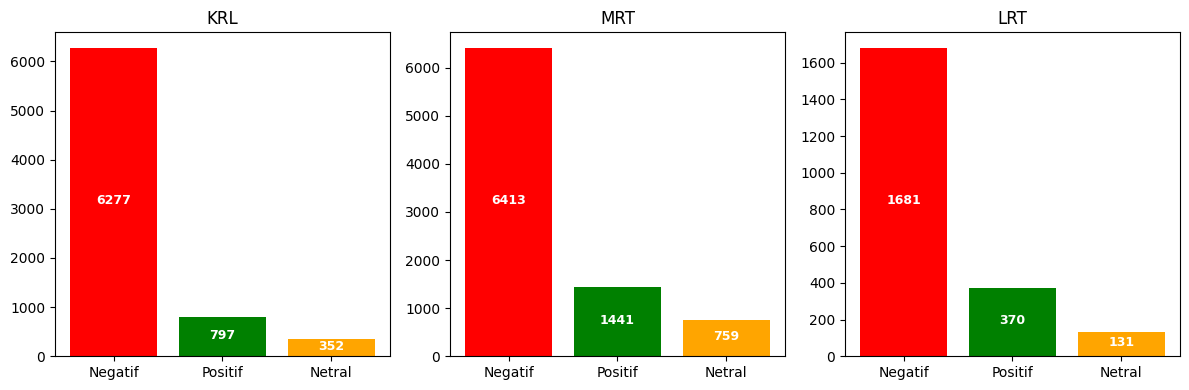

In [ ]:
# prompt: tampilkan barchart untuk 3 plot dari kolom sentiment dari masing-masing dataset, dimana positif berwarna Hijau, Netral bewarna Orange dan negatif berwarna merah dan untuk ukuran 3x3 dan tampilkan jumlah sentimennya dalam bentuk percentage pada masing-masing ba

import matplotlib.pyplot as plt

# Define colors for each sentiment
colors = {"Positif": "green", "Netral": "orange", "Negatif": "red"}

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot bar charts for each dataset
axes[0].bar(data_preprocess_krl["sentiment"].value_counts().index, data_preprocess_krl["sentiment"].value_counts().values, color=[colors[sentiment] for sentiment in data_preprocess_krl["sentiment"].value_counts().index])
axes[0].set_title("KRL")

axes[1].bar(data_preprocess_mrt["sentiment"].value_counts().index, data_preprocess_mrt["sentiment"].value_counts().values, color=[colors[sentiment] for sentiment in data_preprocess_mrt["sentiment"].value_counts().index])
axes[1].set_title("MRT")

axes[2].bar(data_preprocess_lrt["sentiment"].value_counts().index, data_preprocess_lrt["sentiment"].value_counts().values, color=[colors[sentiment] for sentiment in data_preprocess_lrt["sentiment"].value_counts().index])
axes[2].set_title("LRT")

# Add percentage labels
for ax in axes.flat:
    for bar in ax.containers:
        ax.bar_label(bar, label_type="center", color="white", fontweight='bold', rotation=0, fontsize=9, padding=1)

# Adjust spacing and display plot
plt.tight_layout()
plt.show()

In [ ]:
data_preprocess_krl[['stemming', 'polarity_score', 'sentiment']]

,stemming,polarity_score,sentiment
0,hai kakak kartu krl commuter line guna naik mr...,5,Positif
1,keujanan bogor gigil lama krl pas jakarta ange...,-9,Negatif
2,aku bkn orang jakarta tiap kesana seru gitu ka...,-29,Negatif
3,justru hari lebaran krl sepi jakarta lengang,-7,Negatif
4,ruang ah jakarta mah ribut tawur metro mini pa...,-11,Negatif
...,...,...,...
7789,parah parah jalan thamrin sudirman senayan kal...,-18,Negatif
7790,timur jakarta bapak tumpang tindih sama krl lr...,-1,Negatif
7791,suburban bangkok transport umum kakak kalau ka...,-3,Negatif
7792,aku kerja pp jakartabogor naik krl gimana gitu...,5,Positif


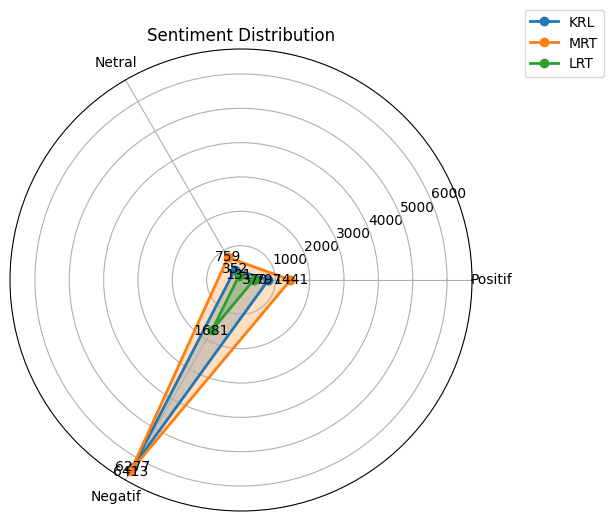

In [ ]:
# Data for the radar chart
categories = ['Positif', 'Netral', 'Negatif']
krl_values = data_preprocess_krl['sentiment'].value_counts().reindex(categories, fill_value=0).values.tolist()
mrt_values = data_preprocess_mrt['sentiment'].value_counts().reindex(categories, fill_value=0).values.tolist()
lrt_values = data_preprocess_lrt['sentiment'].value_counts().reindex(categories, fill_value=0).values.tolist()

# Number of variables
num_vars = len(categories)

# Angle of each axis in the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the circle
krl_values += krl_values[:1]
mrt_values += mrt_values[:1]
lrt_values += lrt_values[:1]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, krl_values, 'o-', linewidth=2, label='KRL')
ax.fill(angles, krl_values, alpha=0.25)
ax.plot(angles, mrt_values, 'o-', linewidth=2, label='MRT')
ax.fill(angles, mrt_values, alpha=0.25)
ax.plot(angles, lrt_values, 'o-', linewidth=2, label='LRT')
ax.fill(angles, lrt_values, alpha=0.25)

# Set the labels for the categories
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Add labels with counts
for i, (krl_val, mrt_val, lrt_val) in enumerate(zip(krl_values[:-1], mrt_values[:-1], lrt_values[:-1])):
    angle_rad = angles[i]
    angle_deg = np.degrees(angle_rad)
    ax.text(angle_rad, krl_val + 10, str(krl_val), ha='center', va='center')
    ax.text(angle_rad, mrt_val + 20, str(mrt_val), ha='center', va='center')
    ax.text(angle_rad, lrt_val + 30, str(lrt_val), ha='center', va='center')

# Set the title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Mendapatkan daftar stopwords
stopwords = factory.get_stop_words()

# Menyimpan daftar stopwords ke dalam list
stopwords_list = list(stopwords)

# Mencetak daftar stopwords
print(stopwords_list)


ModuleNotFoundError: No module named 'Sastrawi'

In [ ]:
# prompt: buatkan plot wordcloud untuk dataset data_preprocess_krl pada masing-masing sentimentnya tanpa menyertakan kata 'jakarta', 'krl', 'bogor', 'jabodetabek' dan yang ditampilkan hanya 100 kata saja
def plot_wordcloud(data, sentiment, max_words):
    words = ' '.join(data[data['sentiment'] == sentiment]['stemming'])
    cleaned_word = " ".join([word for word in words.split()
                            if word not in ['jakarta', 'krl', 'bogor', 'jabodetabek', 'mrt', 'lrt', 'aku', 'kakak', 'kamu', 'orang', 'sama']])
    wordcloud = WordCloud(stopwords=stopwords_list, max_words=max_words, background_color="white").generate(cleaned_word)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} sentiment')
    plt.show()

plot_wordcloud(data_preprocess_krl, 'Positif', 75)
plot_wordcloud(data_preprocess_krl, 'Negatif', 75)
plot_wordcloud(data_preprocess_krl, 'Netral', 75)


In [ ]:
# prompt: buatkan plot wordcloud untuk dataset data_preprocess_krl pada masing-masing sentimentnya tanpa menyertakan kata 'jakarta', 'krl', 'bogor', 'jabodetabek' dan yang ditampilkan hanya 100 kata saja
def plot_wordcloud(data, sentiment, max_words):
    words = ' '.join(data[data['sentiment'] == sentiment]['stemming'])
    cleaned_word = " ".join([word for word in words.split()
                            if word not in ['jakarta', 'krl', 'bogor', 'jabodetabek', 'mrt', 'lrt', 'aku', 'kakak', 'kamu', 'orang', 'sama']])
    wordcloud = WordCloud(stopwords=stopwords_list, max_words=max_words, background_color="white").generate(cleaned_word)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} sentiment')
    plt.show()

plot_wordcloud(data_preprocess_mrt, 'Positif', 75)
plot_wordcloud(data_preprocess_mrt, 'Negatif', 75)
plot_wordcloud(data_preprocess_mrt, 'Netral', 75)


In [ ]:
# prompt: buatkan plot wordcloud untuk dataset data_preprocess_krl pada masing-masing sentimentnya tanpa menyertakan kata 'jakarta', 'krl', 'bogor', 'jabodetabek' dan yang ditampilkan hanya 100 kata saja
def plot_wordcloud(data, sentiment, max_words):
    words = ' '.join(data[data['sentiment'] == sentiment]['stemming'])
    cleaned_word = " ".join([word for word in words.split()
                            if word not in ['jakarta', 'krl', 'bogor', 'jabodebek', 'jabodetabek', 'mrt', 'lrt', 'aku', 'kakak', 'kamu', 'orang', 'sama']])
    wordcloud = WordCloud(stopwords=stopwords_list, max_words=max_words, background_color="white").generate(cleaned_word)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} sentiment')
    plt.show()

plot_wordcloud(data_preprocess_lrt, 'Positif', 75)
plot_wordcloud(data_preprocess_lrt, 'Negatif', 75)
plot_wordcloud(data_preprocess_lrt, 'Netral', 75)


In [ ]:
data_preprocess_krl.to_csv('/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_KRL_Label_Sentiment.csv', index=False)
data_preprocess_mrt.to_csv('/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_MRT_Label_Sentiment.csv', index=False)
data_preprocess_lrt.to_csv('/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_LRT_Label_Sentiment.csv', index=False)